In [1]:
## jupyter notebook to simulate the range of the nuclear recoils in a given decay chain
## this notebook is tuned for the case of Rn-220 daughter implantation into 3 um SiO2 spheres

import numpy as np
import matplotlib.pyplot as plt
import alpha_recoil_sim as ar
import importlib

In [2]:
## make dictionary containing decay chain information for a given list of isotopes
path = "/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/Sphere_Recoils_MC"

iso_list = ['Po-216']

iso_dict = {}

for iso in iso_list:
    ciso = iso[:2].lower()
    cA = iso[-3:]
    iso_dict[iso] = ar.parse_decay_chain(path + "/decay_data/" + ciso + "_" + cA + "_decay_chain.txt")

In [3]:
## Load the Monte Carlo data from SRIM
import pickle

data_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

with open(data_path + 'SRIM_MC_events.pkl', 'rb') as f:
    MC_dict = pickle.load(f)

In [179]:
## Run over the isotopes and various shell materials, and save data
importlib.reload(ar)

sim_name = "Pb212_implant"
iso_list = ['Po-216']
shell_mat = ['SiO2']
shell_thick = [1] ## 1 nm thick SiO2 shell for starting decays
N = 200000

out_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

sim_dict = {}

for iso in iso_list:
    for j,shell in enumerate(shell_mat):

        print("Working on %d events for %s with %s shell"%(N, iso, shell))

        sphere_dict = {"inner_radius": 3000, "outer_shell_thick": shell_thick[j], 
                       "inner_material": "SiO2", "shell_material": shell,
                       "starting_loc": "shell"}

        sim_dict[iso + "_" + shell] = ar.sim_N_events(N, iso, iso_dict, sphere_dict, MC_dict)

with open(data_path + 'simulation_data_%s.pkl'%sim_name, 'wb') as f:
    pickle.dump(sim_dict, f)

Working on 200000 events for Po-216 with SiO2 shell


In [118]:
with open(data_path + 'simulation_data_%s.pkl'%sim_name, 'rb') as f:
    sim_dict = pickle.load(f)

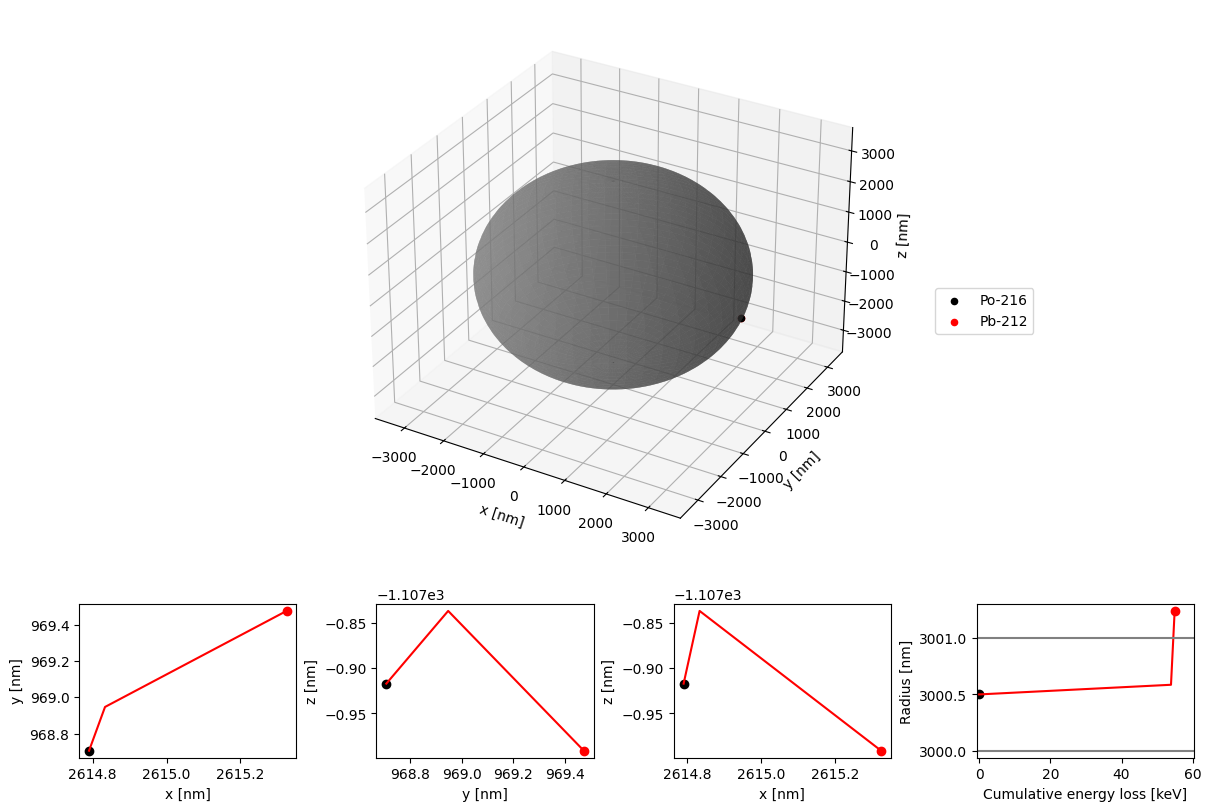

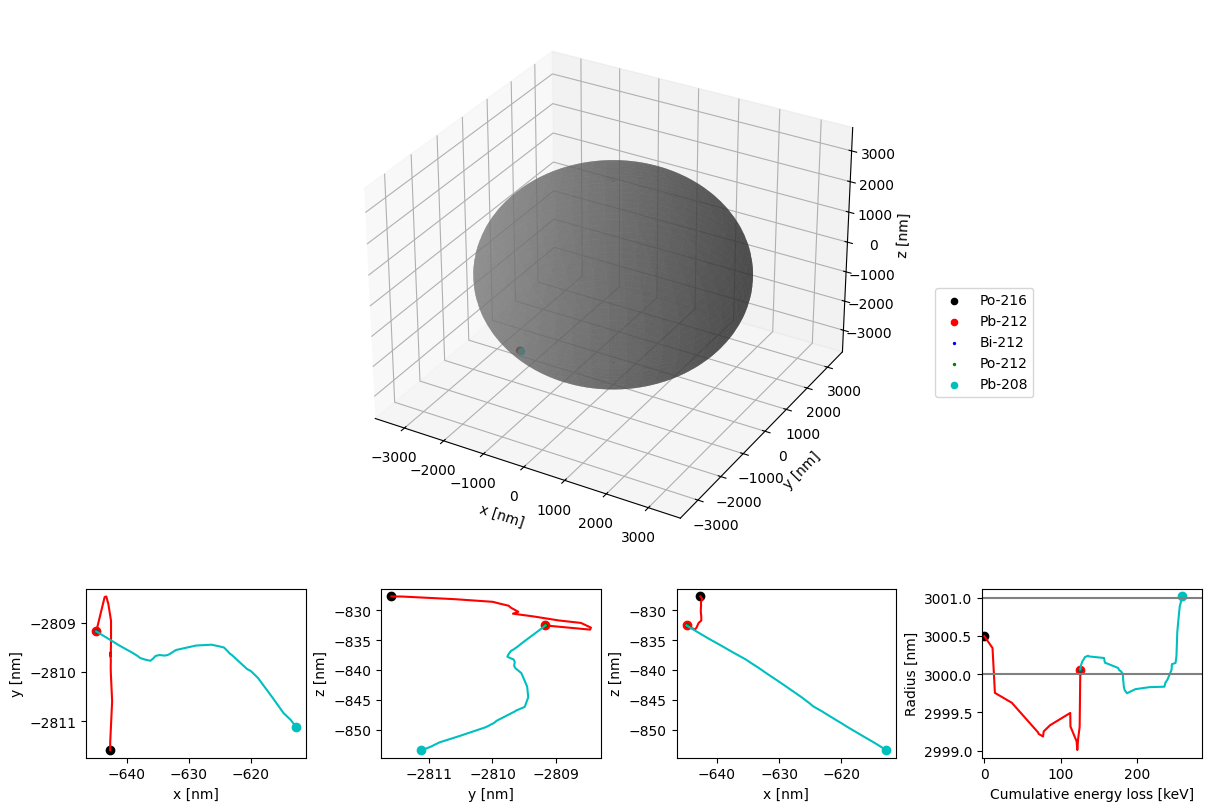

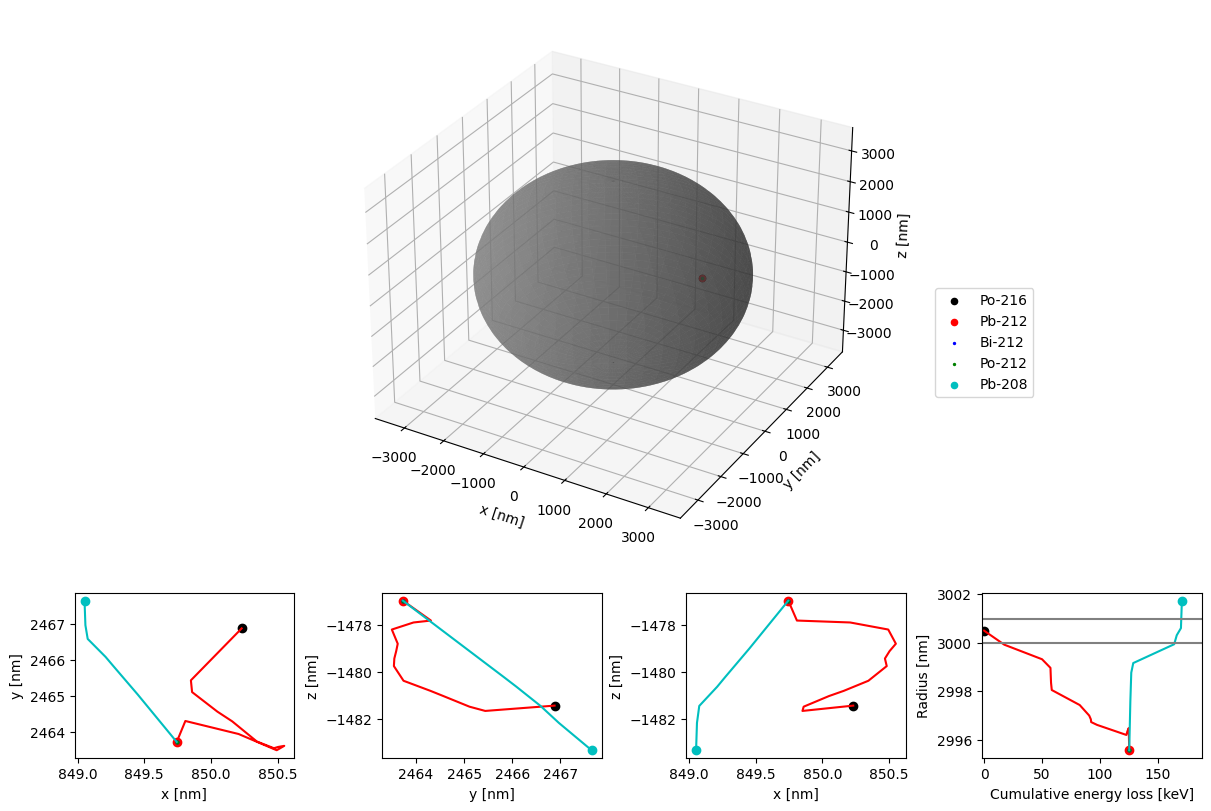

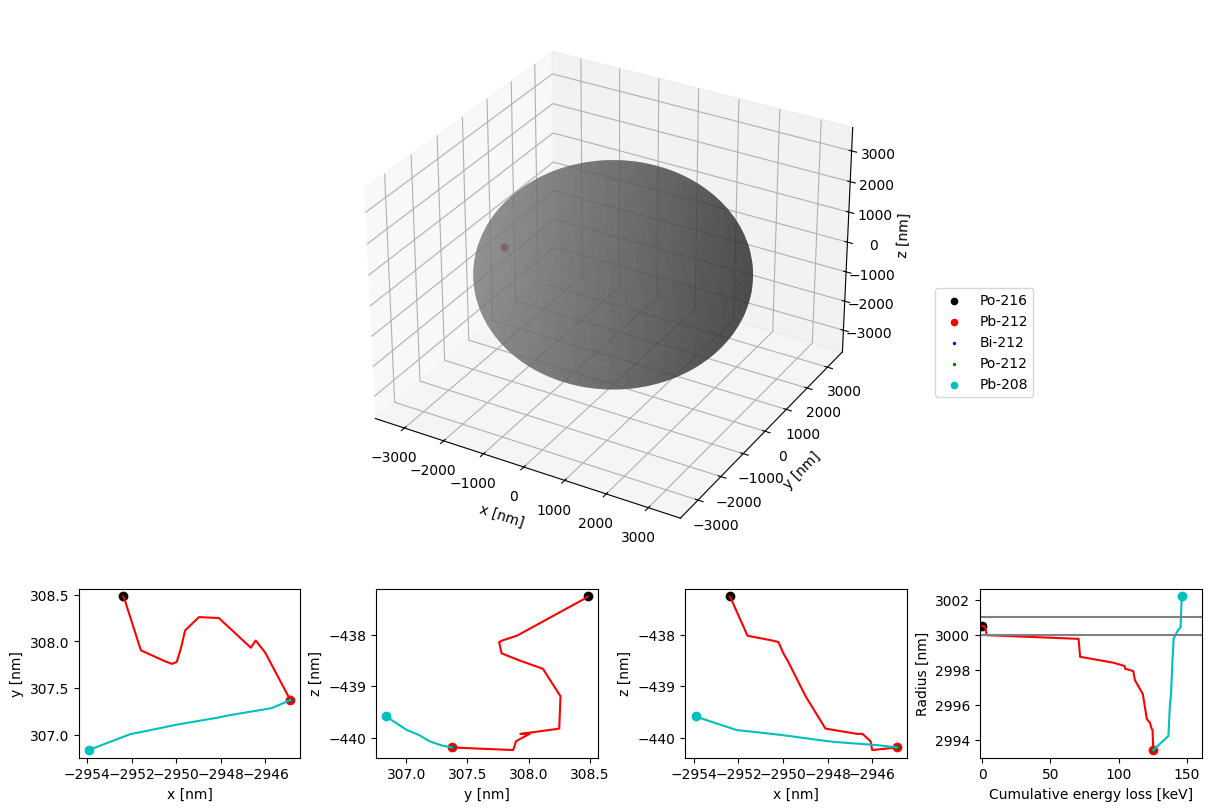

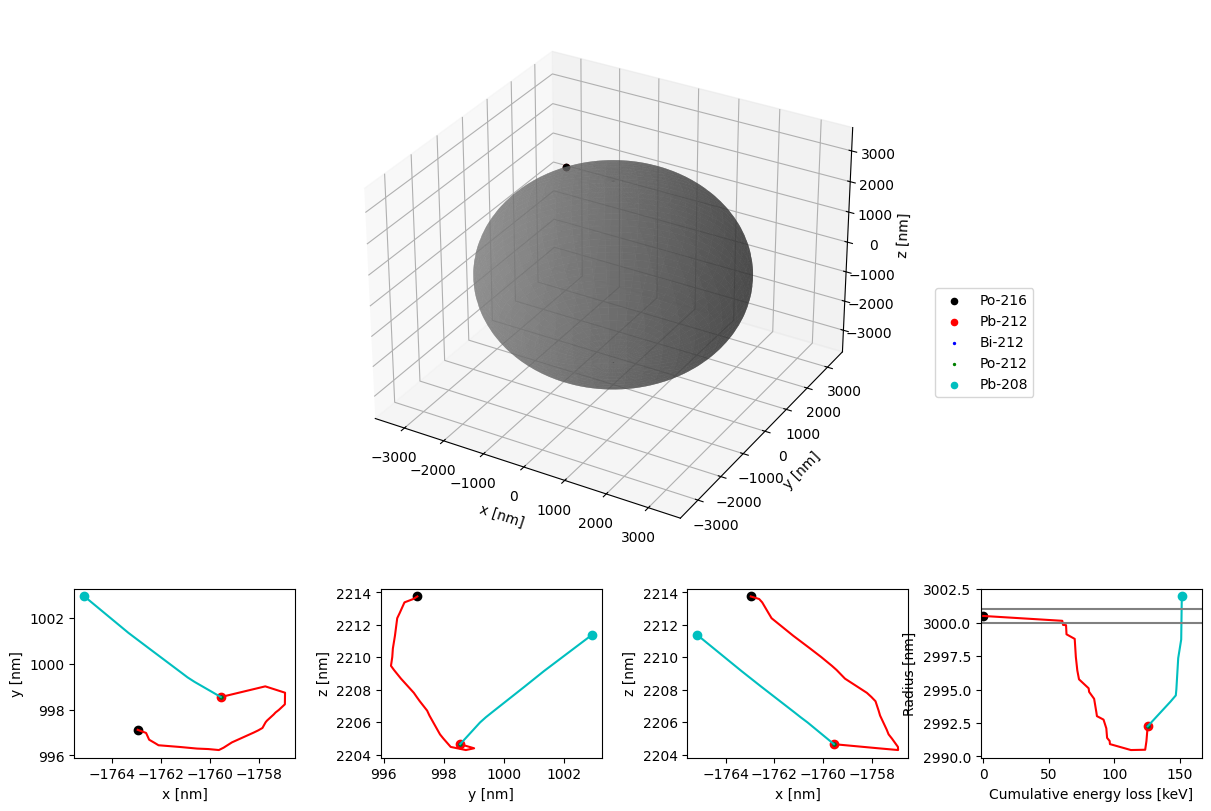

In [120]:
importlib.reload(ar)

iso = "Po-216"
shell = "SiO2"
num = 1

shell_mat = ['SiO2']
shell_thick = [1]

sphere_dict['shell_material'] = shell
sphere_dict['outer_shell_thick'] = 1

for num in range(5):
    fig = ar.plot_event(sim_dict[iso + "_" + shell][num], sphere_dict, rad_lims=[-1,-1], sphere_coords=True)
    #print(sim_dict[iso + "_" + shell][num]['final_momentum'], np.linalg.norm(sim_dict[iso + "_" + shell][num]['final_momentum']))
#plt.savefig(fig_path + "examp_traj_%s_%s_%d.png"%(iso, shell, num), dpi=300)

plt.show()

Found 0 bad points out of 200000: 0.000%


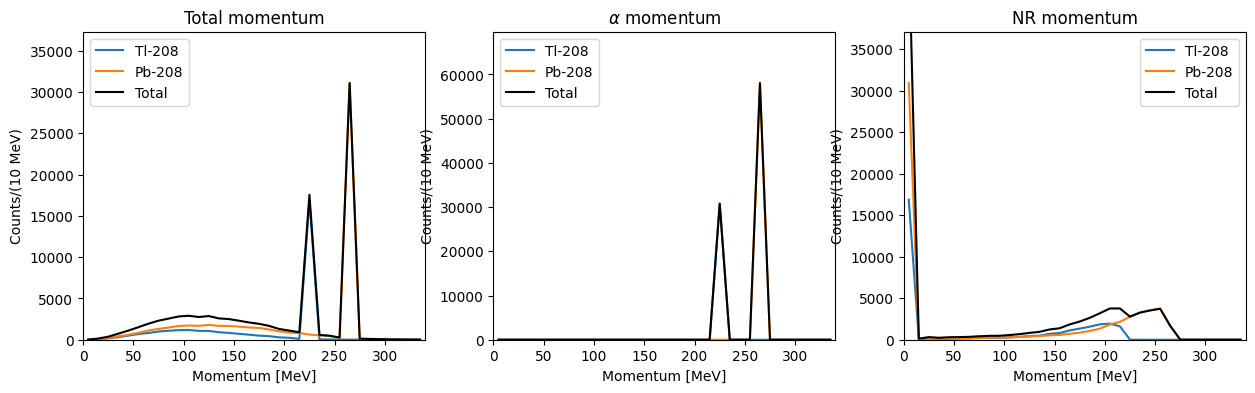

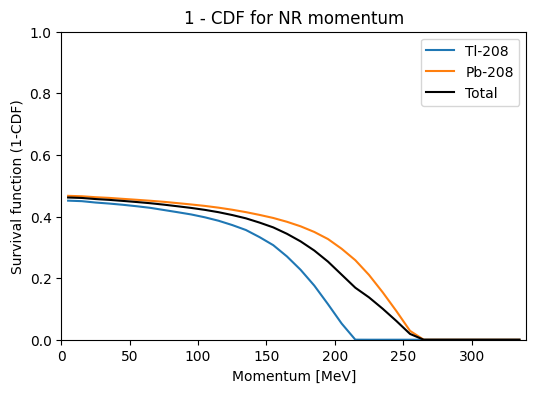

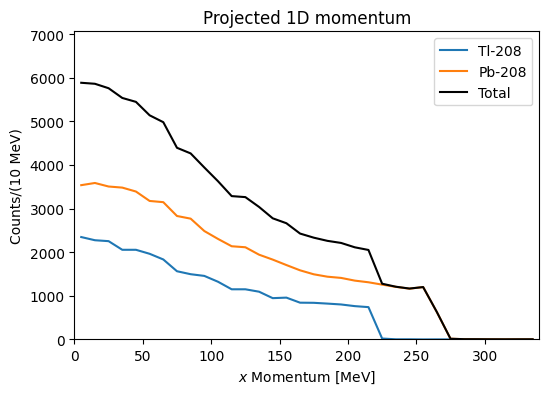

In [181]:
importlib.reload(ar)
ar.reconstruct_momenta(sim_dict['Po-216_SiO2'], add_noise=0)

In [131]:
list(sim_dict['Po-216_SiO2'][0].keys())

['parent', 'start_pos', 'final_NR_momentum', 0, 'final_pos']

In [124]:
sim_dict[iso + "_" + shell][1][0]


{'time': 0.013835669264851946,
 'energy': 125.52407407407408,
 'iso': 'Pb-212',
 'alpha_momentum': array([-227.56316193,  -38.00214826,   31.57917127]),
 'NR_momentum': array([0, 0, 0]),
 'traj': array([[ 1.25524074e+02, -6.42654121e+02, -2.81158185e+03,
         -8.27649333e+02],
        [ 1.14810000e+02, -6.42632718e+02, -2.81141758e+03,
         -8.27663420e+02],
        [ 1.11680000e+02, -6.42383223e+02, -2.81073934e+03,
         -8.28027093e+02],
        [ 1.11680000e+02, -6.42383223e+02, -2.81073934e+03,
         -8.28027093e+02],
        [ 8.95480000e+01, -6.42328171e+02, -2.81058968e+03,
         -8.28107339e+02],
        [ 5.52370000e+01, -6.42541478e+02, -2.80999593e+03,
         -8.28549260e+02],
        [ 5.44670000e+01, -6.42553515e+02, -2.80987498e+03,
         -8.28879175e+02],
        [ 4.87260000e+01, -6.42536679e+02, -2.80974697e+03,
         -8.29204615e+02],
        [ 4.78840000e+01, -6.42568371e+02, -2.80971047e+03,
         -8.29544795e+02],
        [ 3.94870000e+

In [86]:
sim_dict[iso + "_" + shell][1][1]

{'time': 12914.754442714118,
 'energy': 0.0,
 'iso': 'Bi-212',
 'traj': array([[   0.        , 2856.34394713,  862.97242902,  220.67398057]])}

In [92]:
data = sim_dict[iso + "_" + shell][1][2]['traj']
data[-1,3]

220.67398057160162

In [88]:
sim_dict[iso + "_" + shell][1][3]

{'time': 13583.236598870784,
 'energy': 165.75471698113208,
 'iso': 'Pb-208',
 'traj': array([[1.65754717e+02, 2.85634395e+03, 8.62972429e+02, 2.20673981e+02],
        [1.65580000e+02, 2.85635491e+03, 8.62735462e+02, 2.20524538e+02],
        [1.64680000e+02, 2.85639318e+03, 8.61914978e+02, 2.20003919e+02],
        [1.63500000e+02, 2.85641387e+03, 8.61505989e+02, 2.19744074e+02],
        [1.62660000e+02, 2.85649441e+03, 8.60292686e+02, 2.18946619e+02],
        [1.60200000e+02, 2.85652352e+03, 8.59890130e+02, 2.18680854e+02],
        [1.59270000e+02, 2.85656364e+03, 8.59493605e+02, 2.18407831e+02],
        [1.58810000e+02, 2.85662338e+03, 8.58705495e+02, 2.17857677e+02],
        [1.57530000e+02, 2.85668567e+03, 8.57922215e+02, 2.17304613e+02],
        [1.56980000e+02, 2.85675079e+03, 8.57141768e+02, 2.16748177e+02],
        [1.55500000e+02, 2.85688121e+03, 8.55590952e+02, 2.15628426e+02],
        [1.54620000e+02, 2.85695415e+03, 8.54804714e+02, 2.15086352e+02],
        [1.42570000e+02, 2